<a href="https://colab.research.google.com/github/ashithapallath/facemaskdetection-using-cnn/blob/main/facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set image dimensions
img_rows, img_cols = 102, 136
data_path = '/content/drive/MyDrive/archive (4)/data'

# Initialize lists for images (x) and labels (y)
x, y = [], []
counter = 0

# Get the class labels
classes = os.listdir(data_path)
print(classes)

['without_mask', 'with_mask']


In [ ]:
# Iterate through 'with_mask' and 'without_mask' directories
for class_path in os.listdir(data_path):
    class_folder_path = os.path.join(data_path, class_path)

    # Ensure it's a directory
    if os.path.isdir(class_folder_path):
        for img_path in os.listdir(class_folder_path):
            img_full_path = os.path.join(class_folder_path, img_path)

            # Load image and resize
            image = load_img(img_full_path, target_size=(img_rows, img_cols))

            # Convert image to array
            image = img_to_array(image)

            # Append image to 'x' and label (counter) to 'y'
            x.append(image)
            y.append(counter)

    # Increment label counter for the next class
    counter += 1

# Convert lists to numpy arrays for model processing
x = np.array(x)
y = np.array(y)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_val = keras.utils.to_categorical(y_val, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

X_train.shape

(6098, 102, 136, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 132, 6)          │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 49, 66, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 62, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 22, 31, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10912)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       1,309,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,322,766 (5.05 MB)

 Trainable params: 1,322,766 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Fix 'Accuracy' -> 'accuracy'

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=30, callbacks=[early_stopping])


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9947 - loss: 0.0236 - val_accuracy: 0.8885 - val_loss: 0.9222
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9859 - loss: 0.0914 - val_accuracy: 0.9094 - val_loss: 0.4728
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9975 - loss: 0.0107 - val_accuracy: 0.9213 - val_loss: 0.5414
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 7.8061e-04 - val_accuracy: 0.9239 - val_loss: 0.5590
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 3.1310e-04 - val_accuracy: 0.9226 - val_loss: 0.6601
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 1.0486e-04 - val_accuracy: 0.9226 - val_loss: 0.6337
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.0182e-04 - val_accuracy: 0.9226 - val_loss: 0.7412
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 6.3333e

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9039 - loss: 0.5119
Test loss: 0.4999881088733673
Test accuracy: 0.904325008392334


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


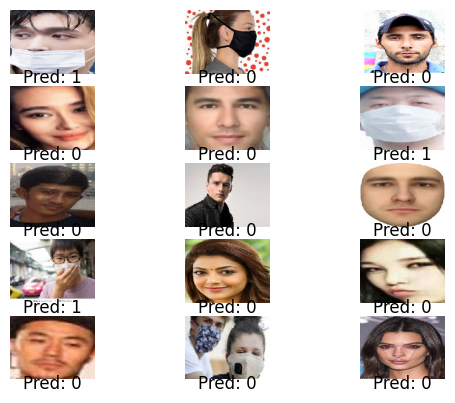

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"), cmap='gray')  # Display the test image
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {predicted_labels[i]}", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.show()

Classification Report:
              precision    recall  f1-score   support

without_mask       0.89      0.93      0.91       397
   with_mask       0.92      0.87      0.90       366

    accuracy                           0.90       763
   macro avg       0.91      0.90      0.90       763
weighted avg       0.91      0.90      0.90       763



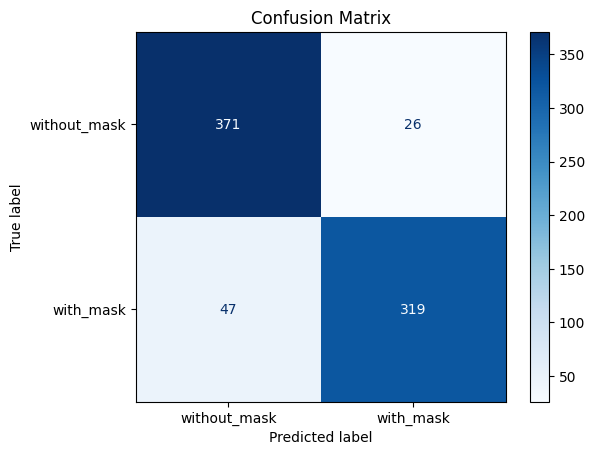

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get the true labels and predicted labels for the test set
true_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integers
predicted_labels = np.argmax(predictions, axis=1)

# Compute precision, recall, and F1 score
report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:")
print(report)

# Compute and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


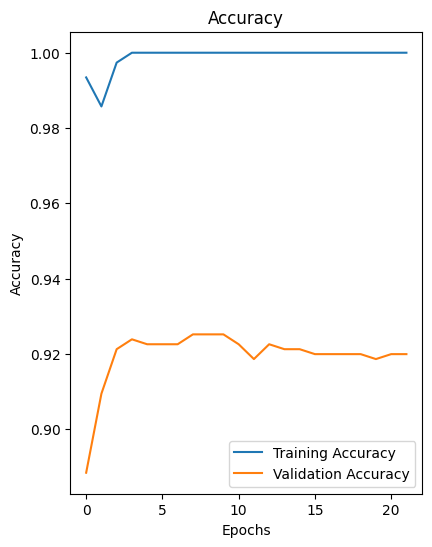

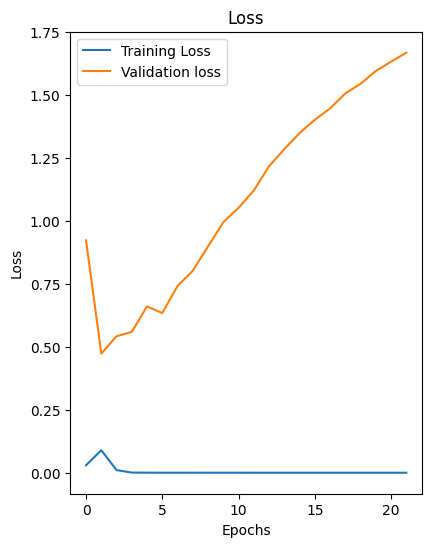

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')  # Changed 'Accuracy' to 'accuracy'
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')  # Changed 'val_Accuracy' to 'val_accuracy'
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()